In [2]:
import pandas as pd

1. **Data Collection**

In [3]:
df = pd.read_csv('mobilerec_final.csv')
display(df.head(5))

,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category
0,com.cleverapps.heroes,It's really a fun game,5,1,"October 21, 2018",shqoc6X1fcJRLEmx,2018-10-21,1.540094e+09,Casual
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,"January 18, 2019",shqoc6X1fcJRLEmx,2019-01-18,1.547788e+09,Health & Fitness
2,com.thrivegames.wordshapes,Love this game,4,1,"January 16, 2021",shqoc6X1fcJRLEmx,2021-01-16,1.610773e+09,Word
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,"November 4, 2021",shqoc6X1fcJRLEmx,2021-11-04,1.635998e+09,Entertainment
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,"November 24, 2021",shqoc6X1fcJRLEmx,2021-11-24,1.637730e+09,Dating


2. **Data Cleaning**


>Firstly, we are cleaning the dataframe by removing the rows with NaN values in the reviews column

> Then, we are removing stopwords from the reviews. We are removing them because they don't add any additional meaning to the text. So we can remove them to have cleaner text. This is usually necessary for NLP approaches, for instance, when we use text based sentiment analysis approach.

In [6]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# function to remove stopword from the dataframe
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]
        filtered_text = " ".join(filtered_words)
        return filtered_text
    else:
        return ""

# cleaned dataframe
df['cleaned_text'] = df['review'].apply(remove_stopwords)

display(df.head(5))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,app_package,review,rating,votes,date,uid,formated_date,unix_timestamp,app_category,cleaned_text
0,com.cleverapps.heroes,It's really a fun game,5,1,"October 21, 2018",shqoc6X1fcJRLEmx,2018-10-21,1.540094e+09,Casual,really fun game
1,com.bodyfast,uninstalling. it was ok but felt like it was c...,2,0,"January 18, 2019",shqoc6X1fcJRLEmx,2019-01-18,1.547788e+09,Health & Fitness,uninstalling. ok felt like controlling hours e...
2,com.thrivegames.wordshapes,Love this game,4,1,"January 16, 2021",shqoc6X1fcJRLEmx,2021-01-16,1.610773e+09,Word,Love game
3,com.affinity.rewarded_play,Doesn't update play time. Just downloaded it 3...,1,1,"November 4, 2021",shqoc6X1fcJRLEmx,2021-11-04,1.635998e+09,Entertainment,update play time. downloaded 3 days ago give c...
4,dating.inmessage.net,app crashes every time I try to log in. what g...,1,0,"November 24, 2021",shqoc6X1fcJRLEmx,2021-11-24,1.637730e+09,Dating,app crashes every time try log in. gives.


3. **Filtering Review**


> We filter reviews to isolate those that contain the identified keywords, which are likely to express concerns regarding app security and privacy.


In [ ]:
keywords = ["unsafe", "hack", "privacy", "malware",
            "data leak", "safety", "permissions"]

# filter the reviews containing the listed tokens or keywords
filtered_reviews = df[df['review'].str.contains('|'.join(keywords), case=False, na=False)]

display(filtered_reviews.head5)

We can get a closer look at what the data we are focusing on looks like

In [22]:
data = filtered_reviews[["review","rating","app_category"]]
positive = data[data["rating"] > 3]
negative = data[data["rating"] <= 3]

In [23]:
print("Shape of positive rating reviews:", positive.shape)
pd.set_option('max_colwidth',None)
display(positive.head(5))

Shape of positive rating reviews: (23925, 3)


,review,rating,app_category
213,"This is a great app overall! After dealing with some, frankly, shady people in some uncomfortable or unsafe situations, I applaud Mercari for making shipping automatic and easy. The app itself can be a little confusing to navigate, (hence the 4 stars). But, because of Mercari, I doubt I'll ever use Let Go or Offer Up again. Thank you :)",4,Shopping
458,"Since the last update, this app has completely become useless! To explain clearer, it can't connect to the microphone and can't record audio which means that you and the other side are both unable to hear each other. Completely mute! All required permissions are allowed and all settings are correct. It will be great if you solve this issue and I'll edit my review. Good luck ✌️.",5,Tools
1178,Works BUT it asks for superuser permissions every 5 seconds. Why?,4,Communication
2071,"Overall, I love this game. Every time there is an update, me friends list gets out of whack and won't sort. Every menu I open is extremely laggy to the point that it will select thing rather than scroll. The updates always seem to throw my GPS location off too and I have to constantly toggle my location services off then back on every block or two. This latest update, won't even load the map. I can still interact with pokemon and pokestops but, if I'm in a new area, I can't tell where they are.",4,Adventure
3040,"Great app, use for hunting and hacking and fishing.",5,Maps & Navigation


In [24]:
print("Shape of negative rating reviews:", negative.shape)
display(negative.head(5))

Shape of negative rating reviews: (61477, 3)


,review,rating,app_category
415,"Keep getting errors ""failed to connect to____"" after install. Something like HDong or similar. Their privacy policy is not loading on my wifi or carrier network. Very sketchy so far, keep your data safe.",1,Productivity
583,"I have to use this for my Galaxy Bud Pro earphones. You cannot access any features to control the headphones with giving it permissions to literally EVERYTHING on your phone which is completely unacceptable. A person should be able to toggle ambient noise pass through with giving their headphones access to LOCATION, CONTACTS, SMS, CALL HISTORY, STORAGE and more. Lazy development, poor execution on the application. Do better please. My Jabra Sound plus requires NONE of those to do its job.",1,Tools
747,"Too much access to your phone, no privacy policy to be found on their website and no source code to skim either. Uninstalled. Otherwise, it was great.",2,Personalization
1017,So I started a new account and now that I have better stuff I was able to complete all of the task however the game still needs a lot of work also you have hackers in your game,3,Action
1198,Way too many permissions and data collection. I own a fossil smart watch and wanted the official app for it but way too much to agree to.,1,Lifestyle


> Based on the above size of both positive and negative reviews, we can conclude that there are many apps that pose security and privacy concerns to the users.

A visualization to analyze the reviews to find whether they cause security concerns or not based on the user ratings and filtered review

<AxesSubplot:>

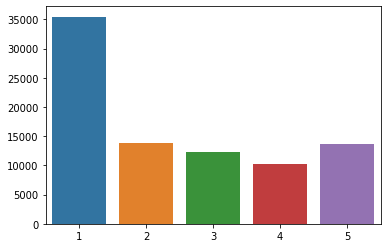

In [25]:
import seaborn as sns
sns.barplot(x=data.rating.value_counts().index, y=data.rating.value_counts().values)

Analyze the most vulnerable app category

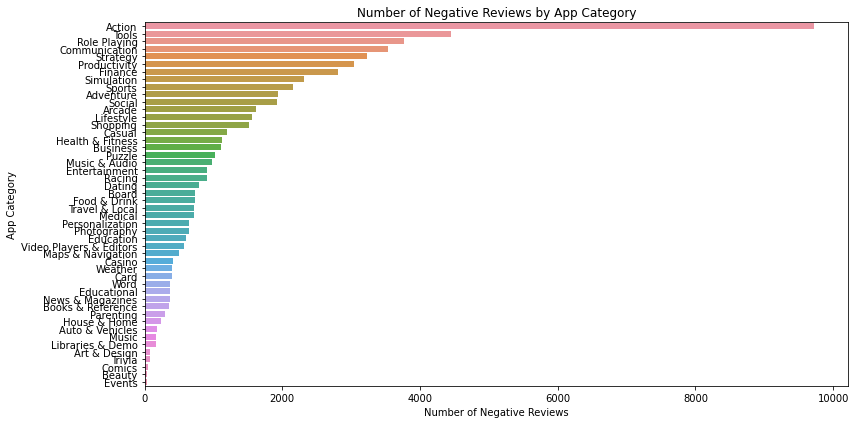

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(data=negative, y='app_category', order=negative['app_category'].value_counts().index)
plt.title('Number of Negative Reviews by App Category')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('App Category')
plt.tight_layout()
plt.show()

The apps falling under the category `Action` seem to be more vulnerable compared to other apps.

**4. Categorizing review based on rating**


> *rating > 3 is considered as a positive review*



> *rating <- 3 is considered as a negative review*

In [ ]:
# assume that if the rating is less than 3, it's unsafe app
unsafe_apps = filtered_reviews[filtered_reviews['rating'] <= 3]['app_name'].unique()

# assume that if the rating is greater than 3, it's a safe app
safe_apps = filtered_reviews[filtered_reviews['rating'] > 3]['app_name'].unique()

print("Unsafe Apps:", unsafe_apps)
print("Safe Apps:", safe_apps)